In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [5]:
acc = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [6]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202130 entries, 0 to 202129
Data columns (total 41 columns):
Unnamed: 0         202130 non-null int64
OBJECTID           202130 non-null int64
INCKEY             202130 non-null int64
COLDETKEY          202130 non-null int64
REPORTNO           202130 non-null object
STATUS             202130 non-null object
ADDRTYPE           202130 non-null object
INTKEY             67263 non-null float64
LOCATION           202130 non-null object
EXCEPTRSNCODE      84141 non-null object
EXCEPTRSNDESC      7190 non-null object
SEVERITYCODE       202129 non-null object
SEVERITYDESC       202130 non-null object
COLLISIONTYPE      179243 non-null object
PERSONCOUNT        202130 non-null int64
PEDCOUNT           202130 non-null int64
PEDCYLCOUNT        202130 non-null int64
VEHCOUNT           202130 non-null int64
INJURIES           202130 non-null int64
SERIOUSINJURIES    202130 non-null int64
FATALITIES         202130 non-null int64
INCDATE            20

In [7]:
[(column, acc[column].unique()) for column in acc.columns if len(acc[column].unique()) < 100]

[('STATUS', array(['Matched', 'Unmatched'], dtype=object)),
 ('ADDRTYPE', array(['Block', 'Intersection'], dtype=object)),
 ('EXCEPTRSNCODE', array([' ', 'NEI', nan], dtype=object)),
 ('EXCEPTRSNDESC', array([nan,
         'Not Enough Information, or Insufficient Location Information'],
        dtype=object)),
 ('SEVERITYCODE', array(['1', '2', '2b', '0', '3', nan], dtype=object)),
 ('SEVERITYDESC', array(['Property Damage Only Collision', 'Injury Collision',
         'Serious Injury Collision', 'Unknown', 'Fatality Collision'],
        dtype=object)),
 ('COLLISIONTYPE',
  array(['Angles', 'Rear Ended', 'Parked Car', 'Other', 'Sideswipe',
         'Right Turn', 'Pedestrian', 'Head On', 'Left Turn', nan, 'Cycles'],
        dtype=object)),
 ('PERSONCOUNT',
  array([ 2,  3,  4,  7,  5,  1,  0,  6,  9,  8, 13, 12, 16, 17, 11, 26, 22,
         10, 37, 28, 36, 14, 19, 53, 30, 29, 23, 44, 15, 32, 21, 20, 41, 27,
         35, 43, 81, 18, 48, 25, 24, 34, 57, 39, 47, 31, 54, 93])),
 ('PEDCOUNT',

For warmup, et's try to predict 'HITPARKEDCAR' by the location.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [74]:
X = acc[['longitude','latitude']]
y_f = np.array(acc[['HITPARKEDCAR']]).reshape(-1,)
type(y_f)

numpy.ndarray

In [81]:
y = np.array([y_f=='Y']).reshape(-1,)
# y=y_f
y.shape

(202130,)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

/Users/franzmornau/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
probabilities

array([0.04482749, 0.04470675, 0.04477006, ..., 0.04476012, 0.04475146,
       0.04471677])

In [84]:
probabilities.max()

0.044884272371916833

In [85]:
probabilities.min()

0.044659845284509905

(looks not very promising)

In [86]:
%run src/myroc_curve.py

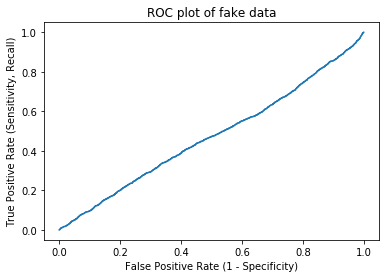

In [87]:
tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC of LR prediction of 'hit parked car'")
plt.show()

As expected, this gets us nowhere. I would expect that there is at least some correlation to neighborhood, but obviously (and not surprisingly) it's not detectable with linear methods (because the nature of the neighborhoods doesn't follow a linear distributions).